# Waste

We generate so much waste

Messing about with the [National Waste Data](https://www.dcceew.gov.au/environment/protection/waste/national-waste-reports/2022)

`imports`, you've seen this before!

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
import os
from datetime import datetime


In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

waste_data = pd.read_excel(r"C:/Users/grace/Desktop/waste_data.xlsx")
waste_data.head()


#df = pd.read_excel(r"C:/Users/grace/Desktop/waste_data.xlsx")
#print(df)

,Unnamed: 0,Introduction to the National Waste Database 2022,Unnamed: 2,Unnamed: 3
0,NaN,NaN,Date:,2022-11-25 00:00:00
1,NaN,NaN,Version:,"2022, issued v6"
2,NaN,NaN,Project name:,National waste data and reporting 2022
3,NaN,NaN,Client:,"Dept. of Climate Change, Energy, the Environme..."
4,NaN,NaN,Workbook authors:,"Piya Nyunt, Sally Donovan, Luke Richmond"


Some magic that tells jupyter to put graphs and things in the notebook instead of the default behaviour which is to save it as a file.

In [3]:
%matplotlib inline

Set the size of the plots that will come out when we ask for them. Annoyingly, these are in inches. Whatever an "inch" is

In [4]:
plt.rcParams["figure.figsize"] = (10, 5)
#

In [5]:
saved_style_state = matplotlib.rcParams.copy()  # give us a style state to go back to
#

Let's check to see if we've already downloaded the data. It's a big file, so we don't want to do it every time we run the code. Even just loading from file takes a few seconds!

Pandas is pretty smart, it can get data from the internet just as easily as from the file system, it just takes a bit longer.


In [6]:
# if os.path.isfile("waste_data.xlsx"):
#     filepath = "waste_data.xlsx"
#     print("loading from file")
# else:
#     filepath = "https://www.dcceew.gov.au/environment/protection/waste/national-waste-reports/2022"
#     print("loading from the internet")

# waste_data = pd.read_excel(filepath)
# print("done")
#understand this, it's in the exam
#load data from csv, if not, download on the internet

In [7]:
filepath = "waste_data.xlsx"
waste_data = pd.read_excel(filepath, sheet_name="Database 2022")

C:\Users\grace\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [8]:
waste_data.head()
#shows the data
#data wrangler??

,Year,Jurisdiction,Category,Type,Classification,Total type,Stream,Management,Fate,Tonnes,Core or non-core,Sub-stream,Cat. order,Cat. no.,Type order,Type no.,
0,2020-2021,ACT,Biosolids,Biosolids,Type,NaN,C&I,Other disposal,Disposal,20185.549742,Core waste,03 C&I core,03 Organics,C3,14 Biosolids,T14,NaN
1,2020-2021,ACT,Biosolids,Biosolids,Type,NaN,C&I,Recycling,Recycling,0.000000,Core waste,03 C&I core,03 Organics,C3,14 Biosolids,T14,NaN
2,2020-2021,ACT,Biosolids,Biosolids,Type,NaN,Total,Other disposal,Disposal,20185.549742,Core waste,09 Total,03 Organics,C3,14 Biosolids,T14,NaN
3,2020-2021,ACT,Biosolids,Biosolids,Type,NaN,Total,Recycling,Recycling,0.000000,Core waste,09 Total,03 Organics,C3,14 Biosolids,T14,NaN
4,2020-2021,ACT,Biosolids,NaN,Category,NaN,C&I,Other disposal,Disposal,20185.549742,Core waste,03 C&I core,03 Organics,C3,NaN,NaN,NaN


In [9]:
def year_string_to_timesamp(year_string):
    year = int(year_string.split('-')[0])
    return pd.Timestamp(year=year, month=1, day=1, hour=0, minute=0)

waste_data["year_dt"] = waste_data.Year.apply(year_string_to_timesamp)
waste_data.head()

,Year,Jurisdiction,Category,Type,Classification,Total type,Stream,Management,Fate,Tonnes,Core or non-core,Sub-stream,Cat. order,Cat. no.,Type order,Type no.,,year_dt
0,2020-2021,ACT,Biosolids,Biosolids,Type,NaN,C&I,Other disposal,Disposal,20185.549742,Core waste,03 C&I core,03 Organics,C3,14 Biosolids,T14,NaN,2020-01-01
1,2020-2021,ACT,Biosolids,Biosolids,Type,NaN,C&I,Recycling,Recycling,0.000000,Core waste,03 C&I core,03 Organics,C3,14 Biosolids,T14,NaN,2020-01-01
2,2020-2021,ACT,Biosolids,Biosolids,Type,NaN,Total,Other disposal,Disposal,20185.549742,Core waste,09 Total,03 Organics,C3,14 Biosolids,T14,NaN,2020-01-01
3,2020-2021,ACT,Biosolids,Biosolids,Type,NaN,Total,Recycling,Recycling,0.000000,Core waste,09 Total,03 Organics,C3,14 Biosolids,T14,NaN,2020-01-01
4,2020-2021,ACT,Biosolids,NaN,Category,NaN,C&I,Other disposal,Disposal,20185.549742,Core waste,03 C&I core,03 Organics,C3,NaN,NaN,NaN,2020-01-01


`dataframe.head()` gives the top 5 rows, if it was `dataframe.head(3)` it would give the top 3 rows. 

`dataframe.sample(5)` gives you 5 random rows from your dataframe. It's a good way to avoid the trap where you confuse yourself the first few rows are odd.

In [10]:
waste_data.sample(5)
#gives you a random file code(usually the first data of is an outlier to the rest)

,Year,Jurisdiction,Category,Type,Classification,Total type,Stream,Management,Fate,Tonnes,Core or non-core,Sub-stream,Cat. order,Cat. no.,Type order,Type no.,,year_dt
45069,2012-2013,WA,Hazardous wastes,Asbestos (N220),Type,NaN,C&D,Recycling,Recycling,0.000000,Core waste,02 C&D,09 Hazardous wastes,C9,45 Asbestos (N220),T45,NaN,2012-01-01
26377,2016-2017,Vic,Hazardous wastes,Plating and heat treatment (A),Type,NaN,C&I,Treatment,Recycling,0.000000,Core waste,03 C&I core,09 Hazardous wastes,C9,32 Plating and heat treatment (A),T32,NaN,2016-01-01
14556,2018-2019,SA,Biosolids,NaN,Category,NaN,C&I,Other disposal,Disposal,2296.666667,Core waste,03 C&I core,03 Organics,C3,NaN,NaN,NaN,2018-01-01
69427,2006-2007,SA,Organics,Timber,Type,NaN,C&I,Landfill,Energy recovery,3511.000000,Core waste,03 C&I core,03 Organics,C3,12 Timber,T12,NaN,2006-01-01
57475,2009-2010,Vic,Hazardous wastes,Pesticides (H),Type,NaN,C&I,Other disposal,Disposal,0.000000,Core waste,03 C&I core,09 Hazardous wastes,C9,39 Pesticides (H),T39,NaN,2009-01-01


We can also get the list of columns out of the data frame

In [11]:
waste_data.columns
#gets the coloumn out - good for changing the name of the coloumn

Index(['Year', 'Jurisdiction', 'Category', 'Type', 'Classification',
       'Total type', 'Stream', 'Management', 'Fate', 'Tonnes',
       'Core or non-core', 'Sub-stream', 'Cat. order', 'Cat. no.',
       'Type order', 'Type no.', ' ', 'year_dt'],
      dtype='object')

This is useful for you when you are documenting your dataset, you can make each column a heading, and then describe that column's characteristics.

You can't index a row directly, you need to use the `iloc` property. That means the _interger location_, so the zeroeth row would be `df.iloc[0]`. 

This gives us the row as a _Series_.

↓

In [12]:
row_one = waste_data.iloc[1]
row_one
#index locator - makes data like a list
#Nan = N/A

Year                          2020-2021
Jurisdiction                        ACT
Category                      Biosolids
Type                          Biosolids
Classification                     Type
Total type                          NaN
Stream                              C&I
Management                    Recycling
Fate                          Recycling
Tonnes                              0.0
Core or non-core             Core waste
Sub-stream                  03 C&I core
Cat. order                  03 Organics
Cat. no.                             C3
Type order                 14 Biosolids
Type no.                            T14
                                    NaN
year_dt             2020-01-01 00:00:00
Name: 1, dtype: object

Series objects are _very_ similar to dictionaries. They have more properties though.

In [72]:
row_one["Fate"]

'Recycling'

You can access them like a dictionary ☝ or you can access them like a property 👇. 

I like the `my_series.key_name` best, but it won't work if there are spaces in your column title. That can happen if you are getting the data from somewhere else (i.e. you didn't make it).

In [14]:
row_one.Fate
#gives you the same as the window above

'Recycling'

Doing the same thing on a dataframe gives us the whole column

In [15]:
waste_data.Fate

0               Disposal
1              Recycling
2               Disposal
3              Recycling
4               Disposal
              ...       
71491          Recycling
71492    Energy recovery
71493           Disposal
71494    Energy recovery
71495          Recycling
Name: Fate, Length: 71496, dtype: object

# Graphing Continuous Data

<Axes: >

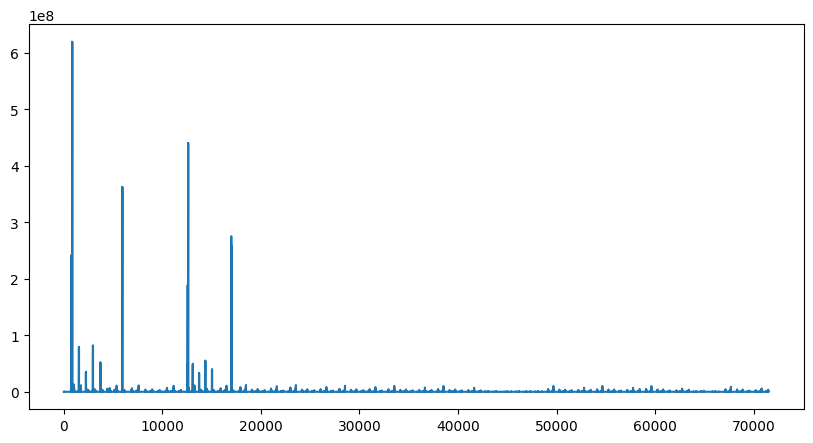

In [16]:
waste_data["Tonnes"].plot()

#only for numerical data, not categorical

If we do a simple `plot` on this column we get a pretty dense, but useless graph. It much better one would be a histogram.

<Axes: >

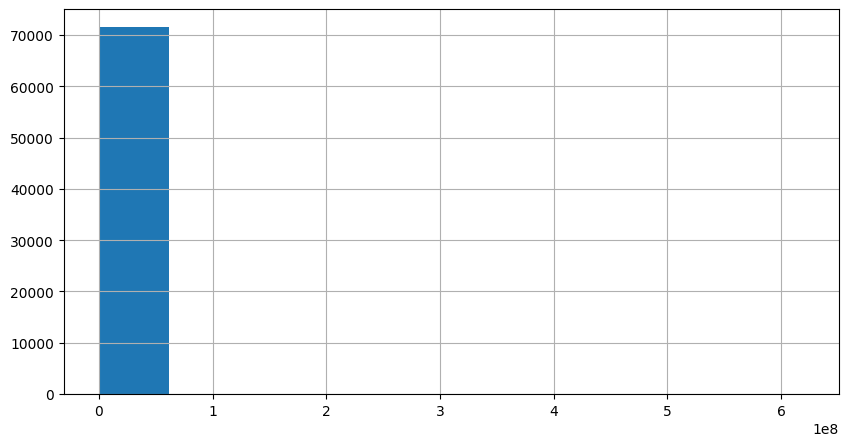

In [17]:
waste_data.Tonnes.hist()
#histogram

The problem we have now is that almost _all_ fines are less than $2000, but there's a very long tail that fills up the right of the graph.

Let's exclude all the values above $3000, and see what it looks like.

We can do that with a nice feature of pandas, _boolean indexing_:

<Axes: >

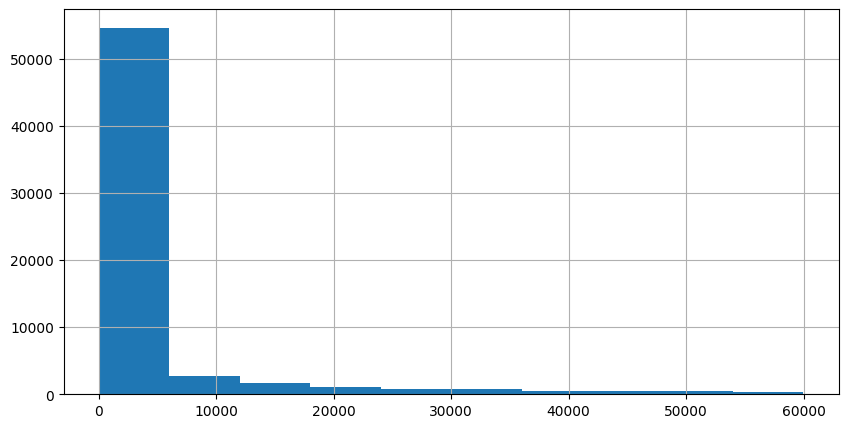

In [18]:
waste_data.Tonnes[waste_data.Tonnes < 60000].hist()
#[waste_data.Tonnes < 3000]. produces a list of boleen, if true, then allows it into the collection
#good for filtering information/categories for your graph
# gives you all the numbers less than 3000
#NUMBER CHANGES THE X-AXIS

That's pretty crazy/powerful, so let's see that happen a bit more clearly.

We'll make our own series and call it  `some_numbers`

Let's give it the values 0-99 

In [19]:
# Note the capital S, I have no idea why they did that!
# but if you get an `AttributeError: 'module' object has no attribute 'series'` error...
#                 v
some_numbers = pd.Series(range(30, 100))
some_numbers.head()


0    30
1    31
2    32
3    33
4    34
dtype: int64

We can use boolean indexing to get just the values that are less than 8

In [20]:
some_numbers[some_numbers % 3 == 0]
#gives you a list of numbers from 0-7


0     30
3     33
6     36
9     39
12    42
15    45
18    48
21    51
24    54
27    57
30    60
33    63
36    66
39    69
42    72
45    75
48    78
51    81
54    84
57    87
60    90
63    93
66    96
69    99
dtype: int64

Or we can be fancy and get the numbers that are less than 4 _or_ more than 97:

In [21]:
some_numbers[(some_numbers < 4) | (some_numbers >= 97)]
# this needs the round brackets, not really sure why.
# | = or
#helps subset data


67    97
68    98
69    99
dtype: int64

We can be _really fancy_ too!  Allow me to introduce the:

# Side-Quest📜: 🎺 List comprehension 🎺

This needs to resolve to a list of booleans that matches the list of inputs. It's filtering only for values that are True.

If we use a list comprehension then we can do almost anything we like!

In [22]:
pets = ["Dog", "Goat", "pig", "Sheep", "Cattle", "Zebu", "Cat", "Chicken", "Guinea pig",             
        "Donkey", "duck", "Water buffalo", "Western honey bee", "dromedary camel", "Horse", 
        "silkmoth", "pigeon", "goose", "Yak", "Bactrian camel", "Llama", "Alpaca",   
        "guineafowl", "Ferret", "muscovy duck", "Barbary dove", "Bali cattle", "Gayal",
        "turkey", "Goldfish", "rabbit", "Koi", "canary", "Society finch", "Fancy mouse",
        "Siamese fighting fish", "Fancy rat and Lab rat", "mink", "red fox", "hedgehog",
        "Guppy"] #list of pets

pets_series = pd.Series(pets) #makes it into a series
pattern_of_bools = [("e" in pet_name) for pet_name in pets_series] 
        #pattern in the series to help filter names with the letter 'n'
        # a 'for' loop but making it flat
        
print("pattern:",pattern_of_bools) 

pets_series[pattern_of_bools] 


#[x/2] for x in range(10) if x % 2 ==0] - stacks a few lines of code into one. Only for short stuff!
# 'n' detects only LOWERCASE n, not N! You gotta change them all to upper or lower, not both 

pattern: [False, False, False, True, True, True, False, True, True, True, False, True, True, True, True, False, True, True, False, True, False, False, True, True, False, True, True, False, True, False, False, False, False, True, True, True, False, False, True, True, False]


3                     Sheep
4                    Cattle
5                      Zebu
7                   Chicken
8                Guinea pig
9                    Donkey
11            Water buffalo
12        Western honey bee
13          dromedary camel
14                    Horse
16                   pigeon
17                    goose
19           Bactrian camel
22               guineafowl
23                   Ferret
25             Barbary dove
26              Bali cattle
28                   turkey
33            Society finch
34              Fancy mouse
35    Siamese fighting fish
38                  red fox
39                 hedgehog
dtype: object

_Note: the first `in` means a different thing to the second `in`. I was wondering if I should leave this out, but it's probably good to expose you to strange stuff!_

You've seen this _pattern_ before, we used to make the grids of stars etc.

In [23]:
pets_we_care_about = []
for this_pet in pets:
    if len(this_pet) == 4:
        pets_we_care_about.append(this_pet)
pets_we_care_about
# 

['Goat', 'Zebu', 'duck', 'mink']

This comes up so often that python has a built in pattern for doing this called a _list comprehension_

This one is pretty silly because it takes the contents of one list and makes a new list out of it. Not doing anything else along the way.

In [24]:
[p for p in pets]
#finds all the p 

['Dog',
 'Goat',
 'pig',
 'Sheep',
 'Cattle',
 'Zebu',
 'Cat',
 'Chicken',
 'Guinea pig',
 'Donkey',
 'duck',
 'Water buffalo',
 'Western honey bee',
 'dromedary camel',
 'Horse',
 'silkmoth',
 'pigeon',
 'goose',
 'Yak',
 'Bactrian camel',
 'Llama',
 'Alpaca',
 'guineafowl',
 'Ferret',
 'muscovy duck',
 'Barbary dove',
 'Bali cattle',
 'Gayal',
 'turkey',
 'Goldfish',
 'rabbit',
 'Koi',
 'canary',
 'Society finch',
 'Fancy mouse',
 'Siamese fighting fish',
 'Fancy rat and Lab rat',
 'mink',
 'red fox',
 'hedgehog',
 'Guppy']

This one converts the list to uppercase while it's doing the transfer

In [25]:
[p.upper() for p in pets]
#makes all 'p' into 'P'

['DOG',
 'GOAT',
 'PIG',
 'SHEEP',
 'CATTLE',
 'ZEBU',
 'CAT',
 'CHICKEN',
 'GUINEA PIG',
 'DONKEY',
 'DUCK',
 'WATER BUFFALO',
 'WESTERN HONEY BEE',
 'DROMEDARY CAMEL',
 'HORSE',
 'SILKMOTH',
 'PIGEON',
 'GOOSE',
 'YAK',
 'BACTRIAN CAMEL',
 'LLAMA',
 'ALPACA',
 'GUINEAFOWL',
 'FERRET',
 'MUSCOVY DUCK',
 'BARBARY DOVE',
 'BALI CATTLE',
 'GAYAL',
 'TURKEY',
 'GOLDFISH',
 'RABBIT',
 'KOI',
 'CANARY',
 'SOCIETY FINCH',
 'FANCY MOUSE',
 'SIAMESE FIGHTING FISH',
 'FANCY RAT AND LAB RAT',
 'MINK',
 'RED FOX',
 'HEDGEHOG',
 'GUPPY']

And this one has a condition. It asks if each pet name `p` is exactly 4 characters long. If it is, it lets it through its filter.

In [26]:
[p for p in pets if len(p) == 4]
#only 5 of em

['Goat', 'Zebu', 'duck', 'mink']

And this one is doing both

In [27]:
[p.upper() for p in pets if len(p) == 5]


['SHEEP', 'HORSE', 'GOOSE', 'LLAMA', 'GAYAL', 'GUPPY']

# Back to Graphs....

Anyway, back to our fines, it looks like we have a similar pattern of fines here, lots at the bottom end, not so many high value ones. 

This is using some pandas magic, not a list comprehension. The magic is that you can compare a series using < or > and get back a list of booleans. This wouldn't work using a list.

Let's add one more thing too, to make these graphs less garbage 🗑, a title.

Text(0.5, 1.0, 'All waste below 1000ton')

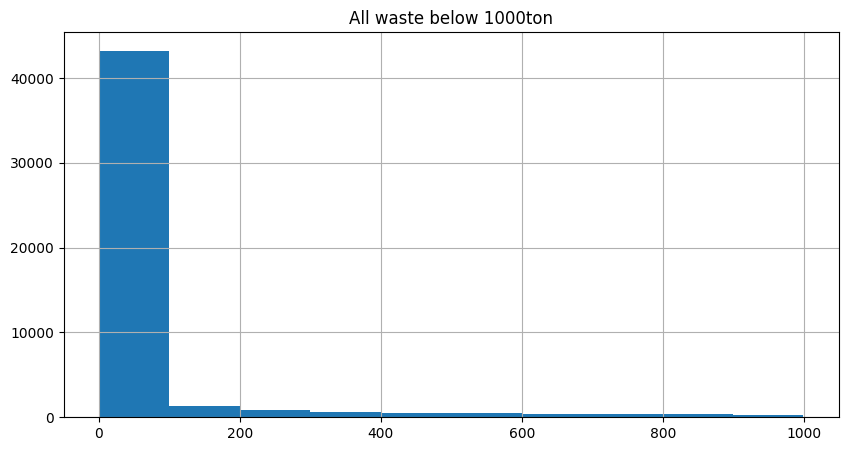

In [28]:
upper_bound = 1000
waste_data.Tonnes[waste_data.Tonnes < upper_bound].hist()
plt.title(f"All waste below {upper_bound}ton")
#title

Let's see what's under $1000

Text(0.5, 1.0, 'All fines under $1000')

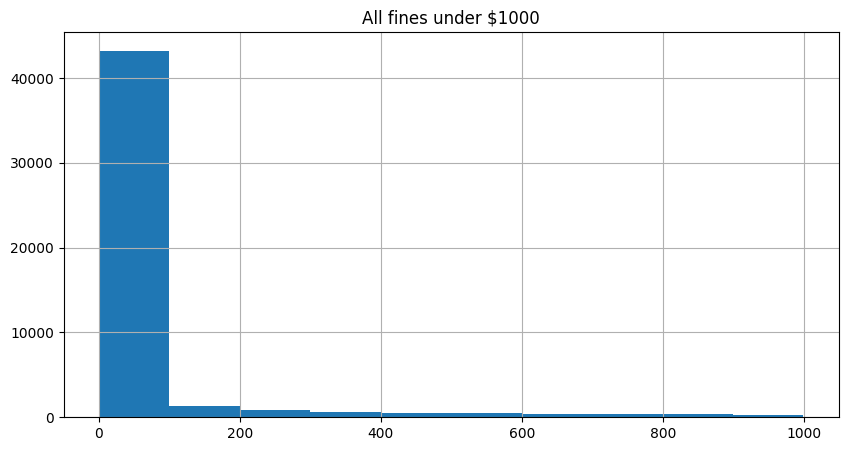

In [29]:
upper_bound = 1000
waste_data.Tonnes[waste_data.Tonnes < upper_bound].hist()
plt.title(f"All fines under ${upper_bound}")


This warants some further investigation, but we'll come back to it in a bit. First, let's look at some of the other columns.

In the `LEGISLATION` column it tells us which law was invoked to give this fine. 

In [30]:
waste_data.head(2)

,Year,Jurisdiction,Category,Type,Classification,Total type,Stream,Management,Fate,Tonnes,Core or non-core,Sub-stream,Cat. order,Cat. no.,Type order,Type no.,,year_dt
0,2020-2021,ACT,Biosolids,Biosolids,Type,NaN,C&I,Other disposal,Disposal,20185.549742,Core waste,03 C&I core,03 Organics,C3,14 Biosolids,T14,NaN,2020-01-01
1,2020-2021,ACT,Biosolids,Biosolids,Type,NaN,C&I,Recycling,Recycling,0.000000,Core waste,03 C&I core,03 Organics,C3,14 Biosolids,T14,NaN,2020-01-01


We can see that `Tonnes` is numbers, we call that a _continuous_ value, so we can make histograms and other kinds of plots of it. `LEGISLATION` is strings, or _categorical_ values. We can't graph a string, but we can count how many times it shows up, and graph that number.

In [31]:
waste_data.Category.value_counts()
#how many times does this value show up in the data set

Category
Hazardous wastes                            47199
Organics                                     7205
Paper & cardboard                            2470
Plastics                                     2124
Building and demolition materials            2028
Textiles, leather & rubber (excl. tyres)     2027
Metals                                       1726
Total                                        1574
Unclassified materials                       1473
Glass                                        1180
Biosolids                                    1152
Ash                                           750
Mining                                        432
Organic processing                             90
Organic primary production                     42
Mineral processing                             24
Name: count, dtype: int64

*ROAD RULES 2008* and *2014* are pretty popular, but only one person got a ticket under the *COMBAT SPORTS REGULATION 2014* and one other person got booked for something under the *TATTOO PARLOURS REGULATION 2013*

<Axes: xlabel='Category'>

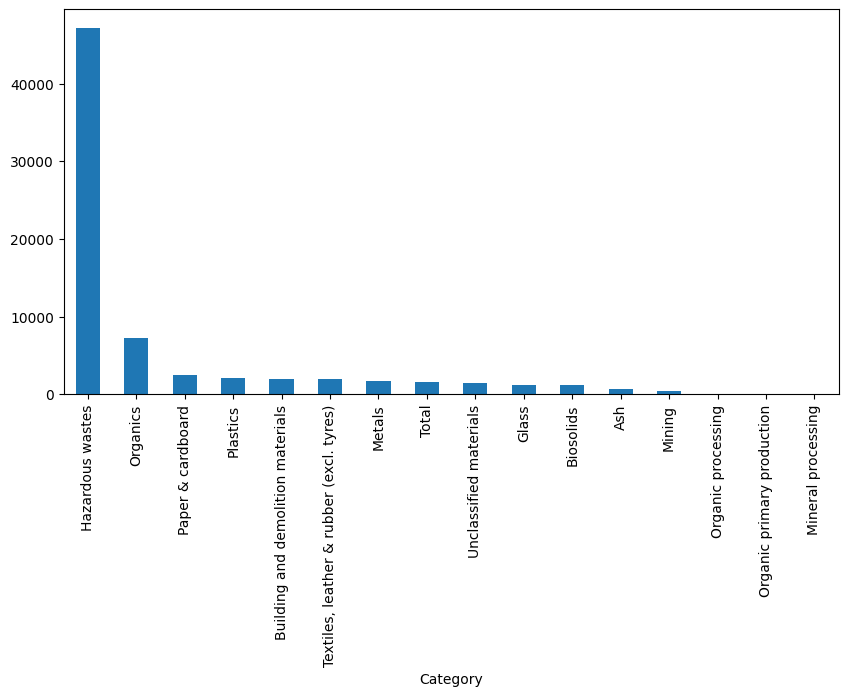

In [32]:
pdvc = waste_data.Category.value_counts() # This makes a series
pdvc.plot(kind="bar")

We're going to see this distribution over and over again as we look at all kinds of data set.

These are probably the most common distributions, but they leave off the [power law](https://en.wikipedia.org/wiki/Power_law), which I think this probably is. 

![some common distributions and their relationships](https://storage.ning.com/topology/rest/1.0/file/get/136706870?profile=original&width=600) 

from [here](https://www.datasciencecentral.com/profiles/blogs/common-probability-distributions-the-data-scientist-s-crib-sheet)

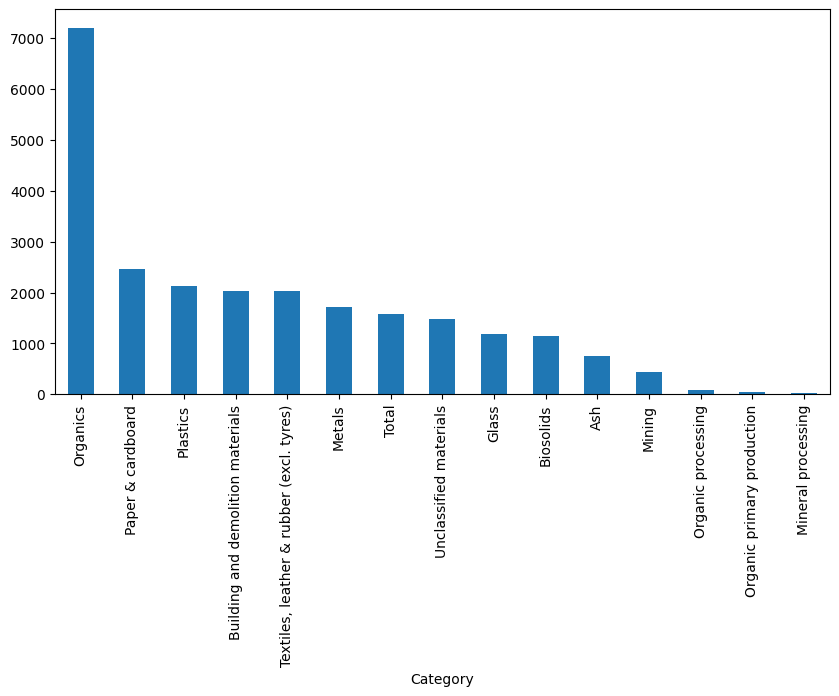

In [33]:
pdvc = waste_data.Category.value_counts() 
pdvc[pdvc < 10000].plot(kind="bar");
#500 zooming in

This pattern keeps repeating itself:

<Axes: xlabel='Category'>

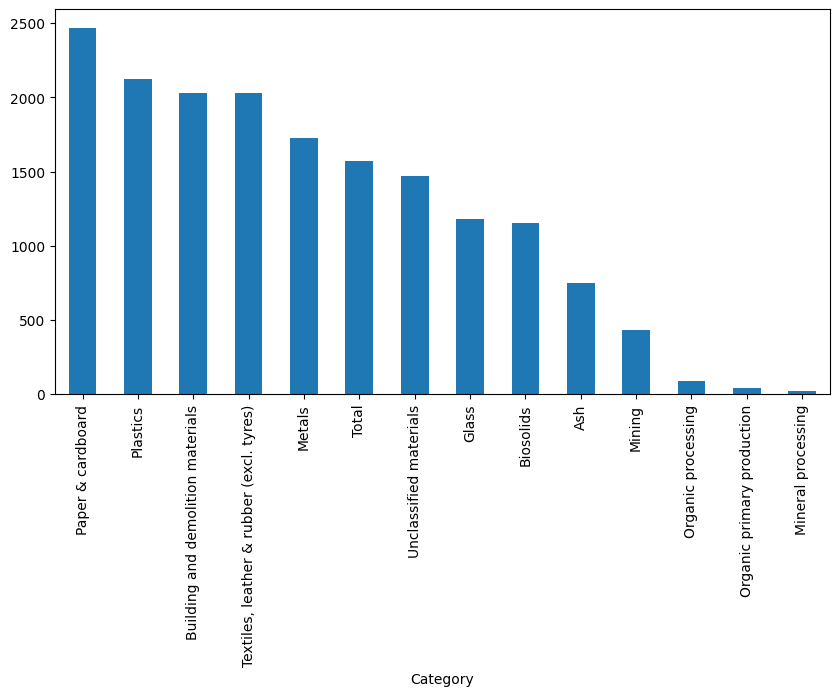

In [34]:
pdvc[pdvc < 3000].plot(kind="bar")

<Axes: xlabel='Category'>

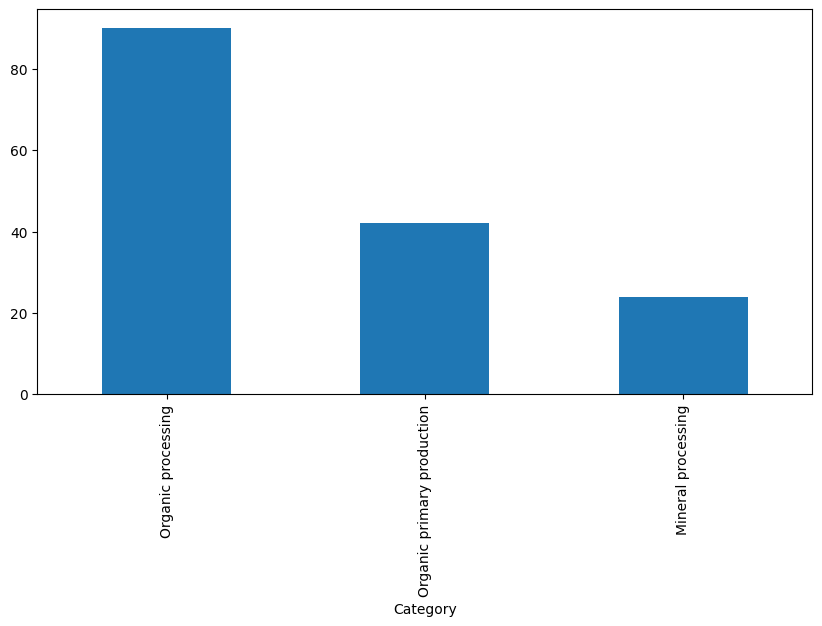

In [35]:
pdvc[pdvc < 100].plot(kind="bar")

There are a bunch of _keyword arguments_ that you can give to the `plot` function. In this case, let's flip it on into its side so we can read the labels more easily:

<Axes: ylabel='Category'>

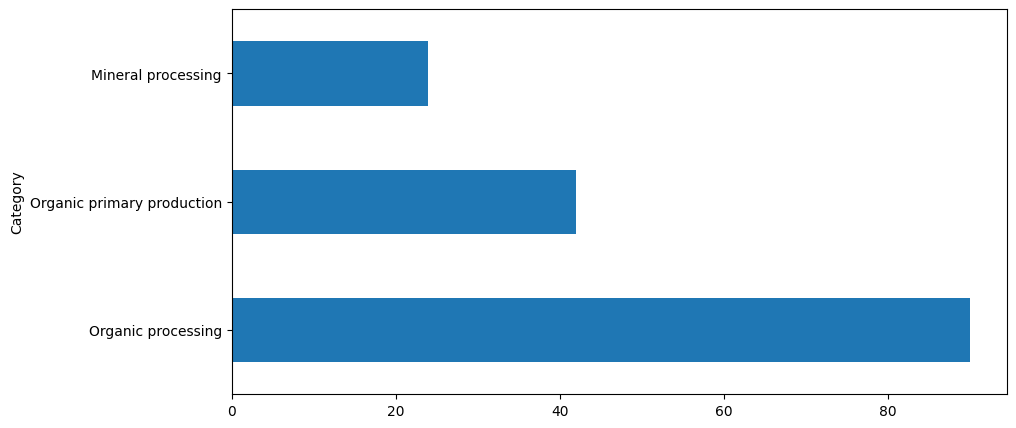

In [36]:
pdvc[pdvc < 100].plot(kind="barh")
#the h makes graph horizontal

# Making plots nice

I said we'd come back to our histogram. [Here's a demo histogram from the matplotlib website](http://matplotlib.org/1.2.1/examples/pylab_examples/histogram_demo.html).

In [37]:
# This bit makes some random data. Ignore it unless you are a total nerd
mu = 100
sigma = 15
x = mu + sigma * np.random.randn(10000)


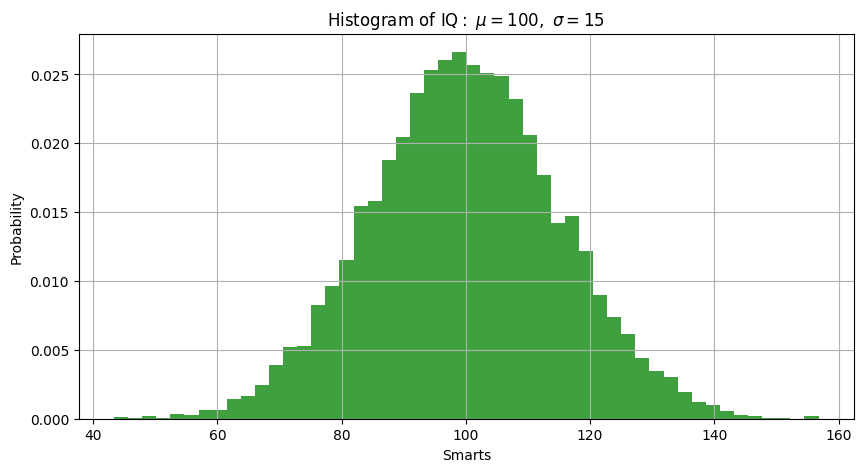

In [38]:
# the histogram of the data
plt.hist(x, 50, density=1, facecolor="green", alpha=0.75)
plt.xlabel("Smarts")
plt.ylabel("Probability")
plt.title(
    r"$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$"
)  # allows for latex formatting
plt.grid(True)
# plt.show()

#made a histogram

Here's how we made our histogram before:

<Axes: >

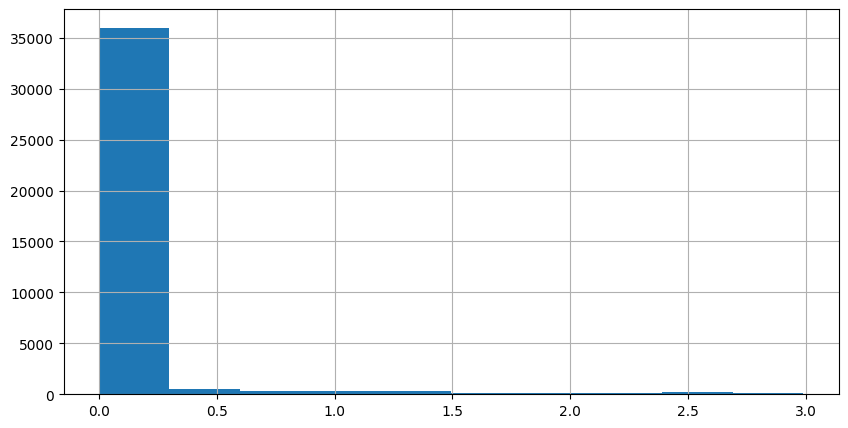

In [39]:
waste_data.Tonnes[waste_data.Tonnes<3].hist()

#stacked it


This is using the graphing tools from inside pandas

And this is how we'd change it so that we can add more features, by using Matplotlib directly:

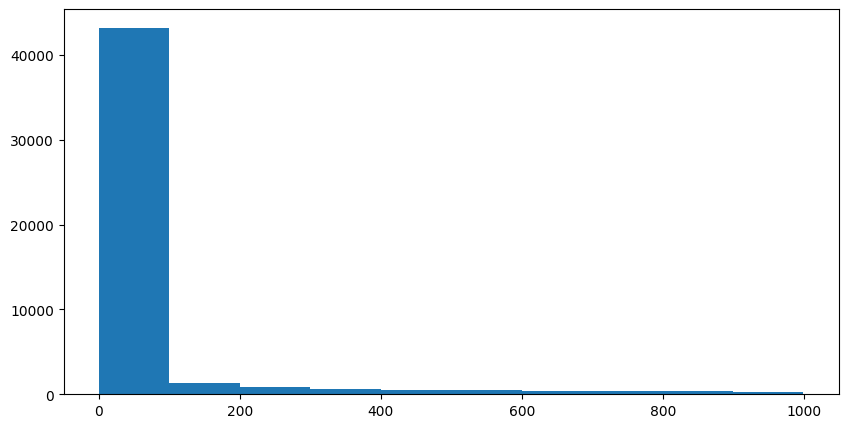

In [40]:
capped_Tonnes_data = waste_data.Tonnes[waste_data.Tonnes < 1000]

plt.hist(capped_Tonnes_data)
plt.show()


Let's look at some of the things we can do to this. The docs for histograms are here: http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist

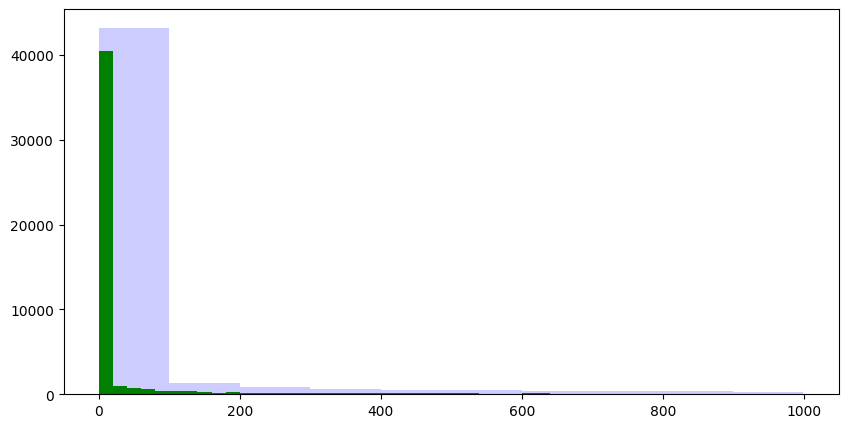

In [41]:
capped_Tonnes_data = waste_data.Tonnes[waste_data.Tonnes < 1000]

# We can keep adding things to this plot to see what's going on.
plt.hist(capped_Tonnes_data, bins=10, facecolor="blue", alpha=0.2)  # <-old one
plt.hist(capped_Tonnes_data, bins=50, facecolor="green", alpha=1)  # <-new one
plt.show()


We can go back to our initial, unfiltered, data:

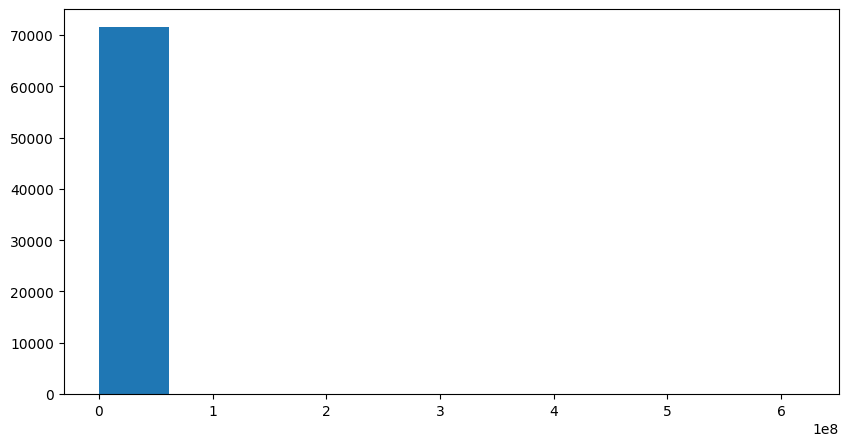

In [42]:
plt.hist(waste_data.Tonnes, bins=10)
plt.show()

#bins-50 - 50 

Instead of doing the filtering before we present the data, we can use the graph to hide the extents of an axis:

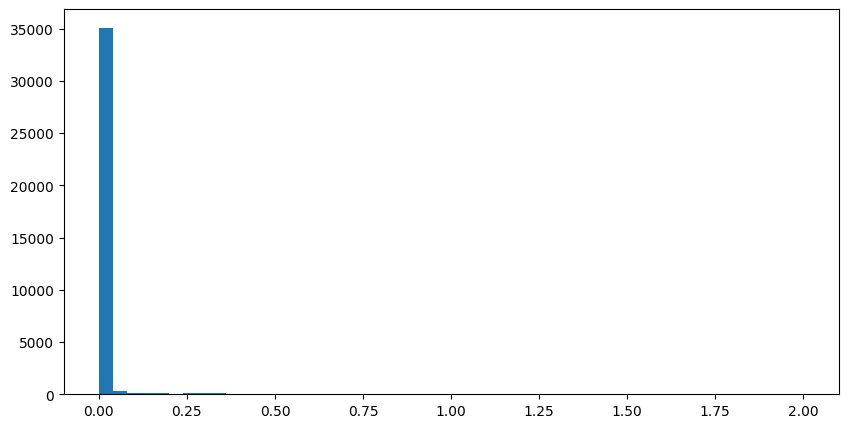

In [43]:
plt.hist(waste_data["Tonnes"], bins=50, range=(0, 2))
plt.show()

#you get an overview of the graph but you can't zoom in

We can nice that up a bit by pulling the parameters out as variables:
(unmagically, no difference!)

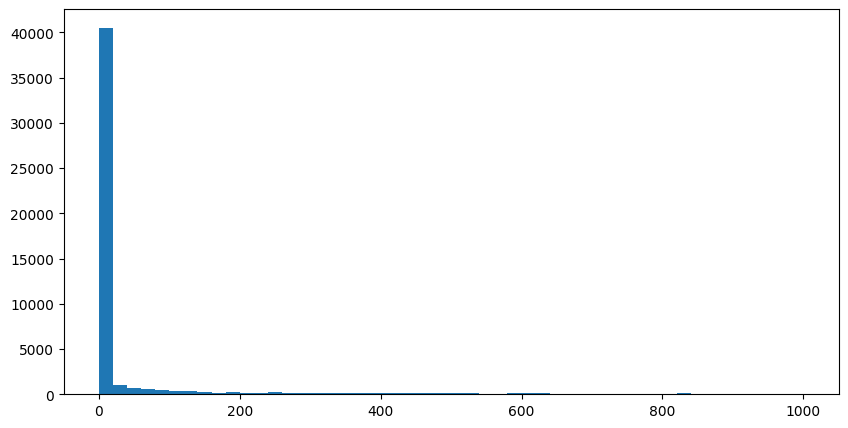

In [44]:
number_of_bins = 50
lower_bound = 0
upper_bound = 1000
plt.hist(
    waste_data.Tonnes,
    bins=number_of_bins,
    range=(lower_bound, upper_bound),
)
plt.show()

#moving the range around

This is still pretty naughty, we should have at least a title and some axis lables.

We do that by setting some more properties on the `plt` object.

Definitely a title and some axis labels. If you make charts/plots without axis labels, Linus Torvalds kills a kitten.

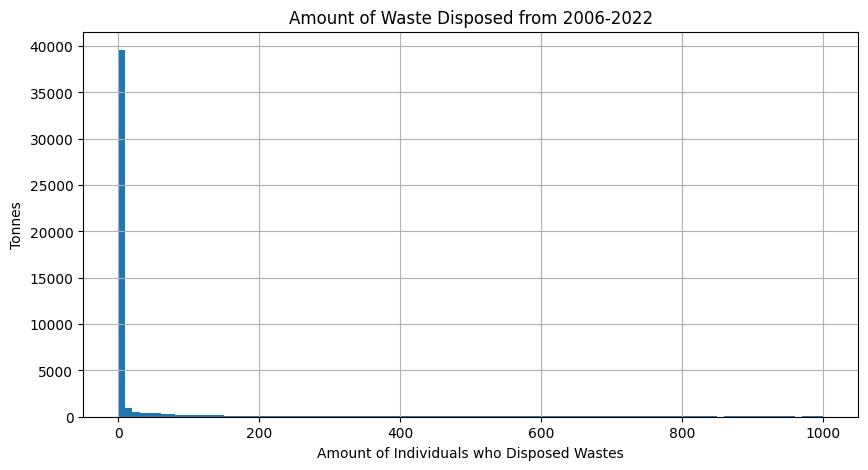

In [45]:
number_of_bins = 100
lower_bound = 0
upper_bound = 1000

plt.hist(waste_data.Tonnes, bins=number_of_bins, range=(lower_bound, upper_bound))
plt.title("Amount of Waste Disposed from 2006-2022", fontsize=12)
plt.xlabel("Amount of Individuals who Disposed Wastes", fontsize=10)
plt.ylabel("Tonnes", fontsize=10)
plt.grid(True)
plt.show()

#plt "plot" 
# . "wants" 
# title/xlabel/ylabel "title / x-label / y-label"

We could get the dates from the dataset if we wanted to be clever about it. But at the moment, the dates are just strings, not useful date objects. Let's fix that.

If we reimport the date, but with a bit more cleverness, we can tell pandas to convert the dates to actual dates.

Because _we_ are civilised, we use either iso dates `YYYY-MM-DD` or `DD-MM-YYYY`, but often you'll have to deal with data prepared by savages who don't respect this rational behaviour. They will use `MM-DD-YY` and other such primitive formats.

The settings used here control how it's read. You can only really tell by looking at the data and working it out. E.g. are there months bigger than 12?

This is some straight up, powerful voodoo.

We can use a simple `min()` and `max()` method on the column to get the date range.

In [46]:
first_date = waste_data.year_dt.min()
last_date = waste_data.year_dt.max()
f"range is: {first_date} to {last_date}"

#2011-11-7 to 2011-11-17

'range is: 2006-01-01 00:00:00 to 2020-01-01 00:00:00'

That's not very nice to look at, so we can [use `strftime`](https://strftime.org/), which is one of the most spooky and powerful things in the python toolbox

In [47]:
date_format_pattern = "%B, %Y"
earliest_date = datetime.strftime(waste_data.year_dt.min(), date_format_pattern)
latest_date = datetime.strftime(waste_data.year_dt.max(), date_format_pattern)
f"range is: {earliest_date} to {latest_date}"

#strfttime displays date at a word(July 11 to November 17)

'range is: January, 2006 to January, 2020'

Which means that we can put those values into our graph title:

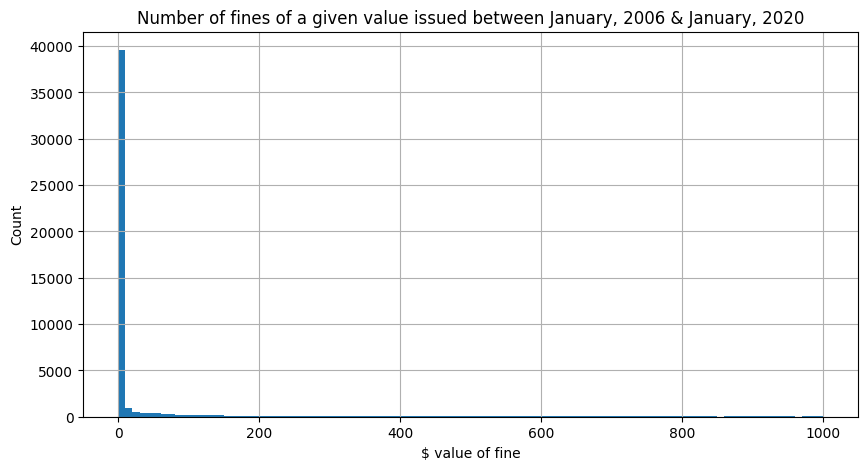

In [48]:
number_of_bins = 100
lower_bound = 0
upper_bound = 1000

plt.hist(
    waste_data["Tonnes"], bins=number_of_bins, range=(lower_bound, upper_bound)
)
plt.title(
    f"Number of fines of a given value issued between {earliest_date} & {latest_date}",
    fontsize=12,
)
plt.xlabel("$ value of fine", fontsize=10)
plt.ylabel("Count", fontsize=10)
plt.grid(True)
plt.show()


We're grouping the fines by month, and then adding up the groups. Pandas' `groupby` feature allows for all kinds of clever stuff like that.

I'm not going to explain `groupby` here, just be aware that it exists, and when you need it, we can go over it again.

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd S

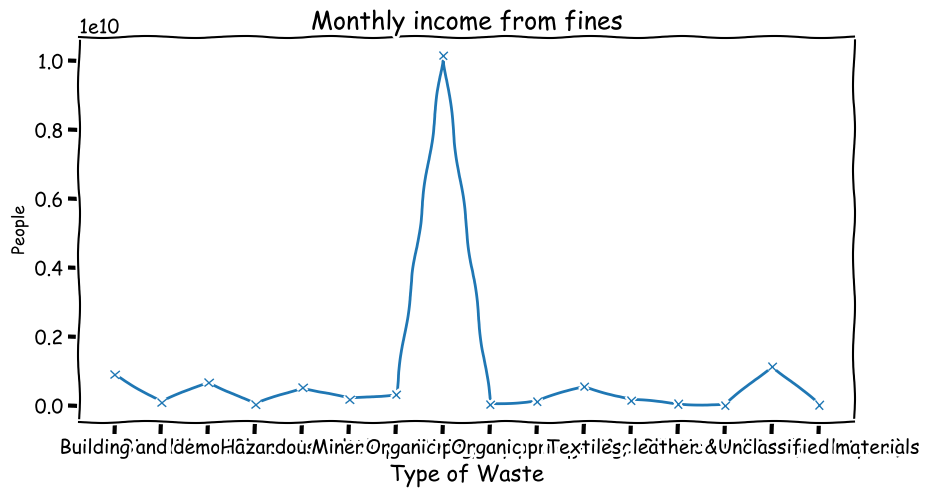

In [49]:
income = waste_data[["Category", "Tonnes"]].groupby("Category").sum()

plt.xkcd()
plt.plot(income, "x-")
plt.title("Monthly income from fines", fontsize=18)
plt.xlabel("Type of Waste", fontsize=16)
plt.ylabel("People", fontsize=12)
plt.grid(True)
plt.show()

#???

In [50]:
matplotlib.rcParams.update(
    saved_style_state
)  # revert to regular matplotlib styles, not xkcd


#??? how to change y-axis into something reasonable


I don't expect you to learn this this week, I just want to give you a taste of what can be done, quite simply, with pandas and matplotlib.

# Some Tricky Tricks

Say you have a _lot_ of rows, running things on them takes a long time. You can test on a subset of that and then come bakc to the full dataframe once you are more sure that it works.

To do this we can use python slices in combination with the dataframe's `.loc` property.

In [51]:
ss = waste_data.loc[:5]
#slicing 
#what is []:5] again

Let's say you want to apply a function to each row in a dataframe, and save the result as a new column in the dataframe. This is where `apply` come in handy.

In [74]:
ss["day_from_lambda"] = ss.apply(lambda x: x.Category.day, axis=1)
ss.head(2)

#lambda
#???

AttributeError: 'str' object has no attribute 'day'

Above is equivalent to below, it's up to you to decide what is more readable.

In [ ]:
def my_f(x):
    return x.OFFENCE_MONTH.day


ss["day_from_function"] = ss.apply(my_f, axis=1)
ss.head(1)
#same as above
#axis=1 same as axis = row/coloumn

AttributeError: 'Series' object has no attribute 'OFFENCE_MONTH'

Scroll all the way to the right to see the new column that we've created. Both of these ways of doing this make dan-numbers. What if we wanted to get day names? That's much easier to graph. W can use `strftime` again:

In [ ]:
def my_f(x):
    return datetime.strftime(x.Category, "%A")


ss["nice_day"] = ss.apply(my_f, axis=1)
ss.head(1)

#strfttime makes the NUMBER of the day(-4) to the ACTUAL NAME of the day(-Thursday)

TypeError: descriptor 'strftime' for 'datetime.date' objects doesn't apply to a 'str' object

Then once we're confident that it works, we can switch back from the limited part of the dataframe to the full dataframe:

In [ ]:
def my_f(x):
    return datetime.strftime(x.Category, "%A")


waste_data["nice_day"] = waste_data.apply(my_f, axis=1)
waste_data.nice_day.value_counts().plot(kind="bar")

# making biggest number to the smaller numbers
# but day of the week is out of order

And we can see that most of these fines are booked on a Sunday, which is a real _hmm_ moment 🤔

This would be the kind of question that it'd be good to explore in your project.

---

How do we tell the computer to treat _facade_ and _fašade_ the same? What about _University of new south wales_, _University of New South Wales_, _University of NSW_, _UNSW_, _New-south_?

## The answer is _folding_

_(This is a "pattern")_

In [ ]:
def fold(given):
    """Return canonical versions of inputs."""

    # Use canonical variables so that you can define once, use many times.
    UNSW_canonical = "uni of stairs"
    ben_name_cannonical = "Ben Doherty"

    # dictionary of input:output pairs
    folds = {
        "University of new south wales": UNSW_canonical,
        "University of New South Wales": UNSW_canonical,
        "University of NSW": UNSW_canonical,
        "UNSW": UNSW_canonical,
        "New-south": UNSW_canonical,
        "BDoh": ben_name_cannonical,
        "Benny": ben_name_cannonical,
        "Mr Dockerty": ben_name_cannonical,
        "Oi, Dickhead!": ben_name_cannonical,
    }

    #     return folds[given] # needs a defensive part, but ommited for clarity.
    default_value = given
    return folds.get(given, default_value)


print(fold("New-south"))
print(fold("BDoh"))

#folding = pattern = sequence of things you can do that makes sense, an idea you can take on
# complies "UNSW" and "University of NSW" data into the same

So you could use this function in an `apply` to make a new column on cleaned up values.

# _fin_

# -------------------------------------------------------------------------------------------------------------------


# All cells with "Hazardous Wastes" in "Category" category

In [ ]:
waste_data = waste_data[waste_data['Category'] == 'Hazardous wastes']
waste_data

,Year,Jurisdiction,Category,Type,Classification,Total type,Stream,Management,Fate,Tonnes,Core or non-core,Sub-stream,Cat. order,Cat. no.,Type order,Type no.,,year_dt
64,2020-2021,ACT,Hazardous wastes,Acids (B),Type,NaN,C&D,Energy from waste facility,Energy recovery,0.000000,Core waste,02 C&D,09 Hazardous wastes,C9,33 Acids (B),T33,NaN,2020-01-01
65,2020-2021,ACT,Hazardous wastes,Acids (B),Type,NaN,C&D,Landfill,Disposal,0.000000,Core waste,02 C&D,09 Hazardous wastes,C9,33 Acids (B),T33,NaN,2020-01-01
66,2020-2021,ACT,Hazardous wastes,Acids (B),Type,NaN,C&D,Other disposal,Disposal,0.000000,Core waste,02 C&D,09 Hazardous wastes,C9,33 Acids (B),T33,NaN,2020-01-01
67,2020-2021,ACT,Hazardous wastes,Acids (B),Type,NaN,C&D,Recycling,Recycling,0.000000,Core waste,02 C&D,09 Hazardous wastes,C9,33 Acids (B),T33,NaN,2020-01-01
68,2020-2021,ACT,Hazardous wastes,Acids (B),Type,NaN,C&D,Treatment,Disposal,0.000000,Core waste,02 C&D,09 Hazardous wastes,C9,33 Acids (B),T33,NaN,2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71267,2006-2007,WA,Hazardous wastes,NaN,Total,Hazwaste total,Total,Other disposal,Disposal,2265.608983,Core waste,09 Total,09 Hazardous wastes,C9,NaN,NaN,NaN,2006-01-01
71268,2006-2007,WA,Hazardous wastes,NaN,Total,Hazwaste total,Total,Recycling,Recycling,303027.798910,Core waste,09 Total,09 Hazardous wastes,C9,NaN,NaN,NaN,2006-01-01
71269,2006-2007,WA,Hazardous wastes,NaN,Total,Hazwaste total,Total,Treatment,Disposal,15610.394637,Core waste,09 Total,09 Hazardous wastes,C9,NaN,NaN,NaN,2006-01-01
71270,2006-2007,WA,Hazardous wastes,NaN,Total,Hazwaste total,Total,Treatment,Energy recovery,4980.342229,Core waste,09 Total,09 Hazardous wastes,C9,NaN,NaN,NaN,2006-01-01


# Not sure what I did here...

In [63]:
waste_data['Tonnes'] = waste_data['Tonnes'].astype(int)
waste_data["Type"] = waste_data["Type"].astype(str)

# Counted the amount of categories in "Type" column

In [65]:
waste_data["Type"].value_counts()

Type
nan                                            17268
Tyres (T140)                                    2416
Other hazardous organic wastes (K140, K190)     2208
Clinical and pharmaceutical (R)                 2208
Other soil/sludges (other N)                    2208
                                               ...  
Red mud                                            4
CSG brines                                         4
Sugarcane mill mud                                 2
Sugarcane bagasse (available)                      2
Cotton gin trash                                   2
Name: count, Length: 78, dtype: int64

# TONNES of waste per CATEGORY in AUSTRALIA

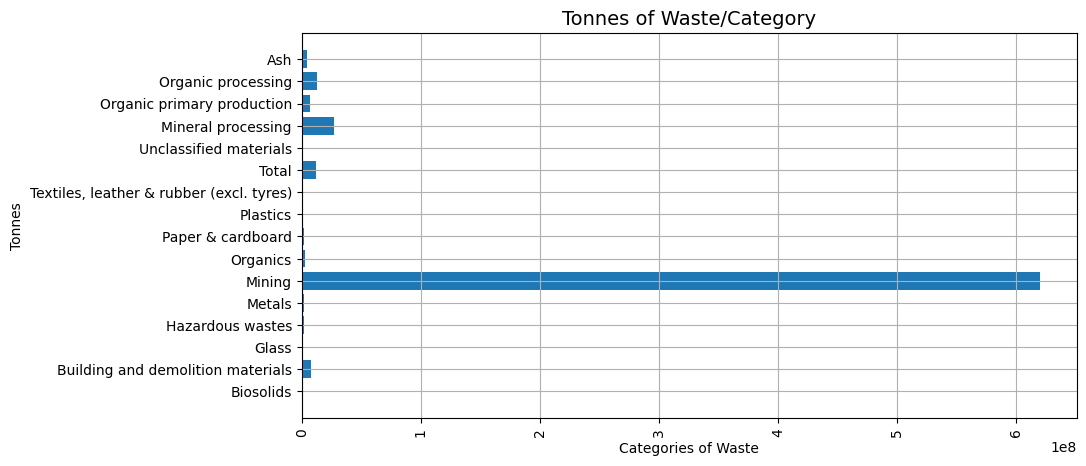

In [91]:
plt.figure()
plt.barh(waste_data['Category'], waste_data['Tonnes'])
plt.tick_params(axis='x', labelrotation=90)

plt.title("Tonnes of Waste/Category", fontsize=14)
plt.xlabel("Categories of Waste", fontsize=10)
plt.ylabel("Tonnes", fontsize=10)
plt.grid(True)
plt.show()

plt.show()

# TONNES of waste per STATE

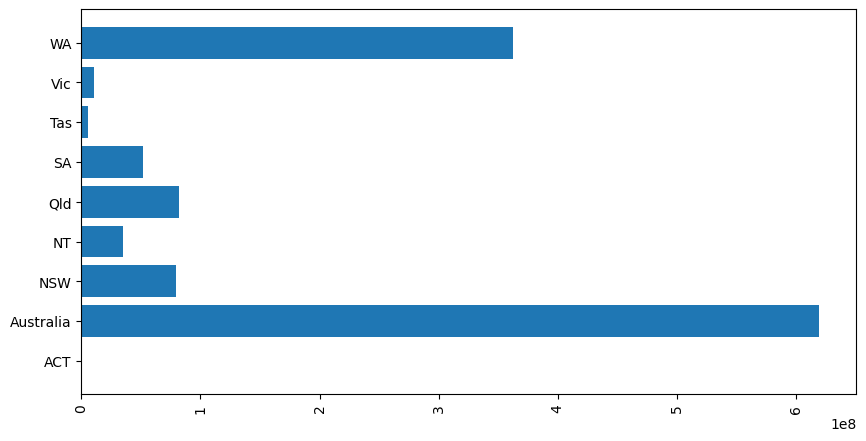

In [89]:
plt.figure()
plt.barh(waste_data['Jurisdiction'], waste_data['Tonnes'])
plt.tick_params(axis='x', labelrotation=90)
plt.show()

# WHY do you have so much waste @WA????

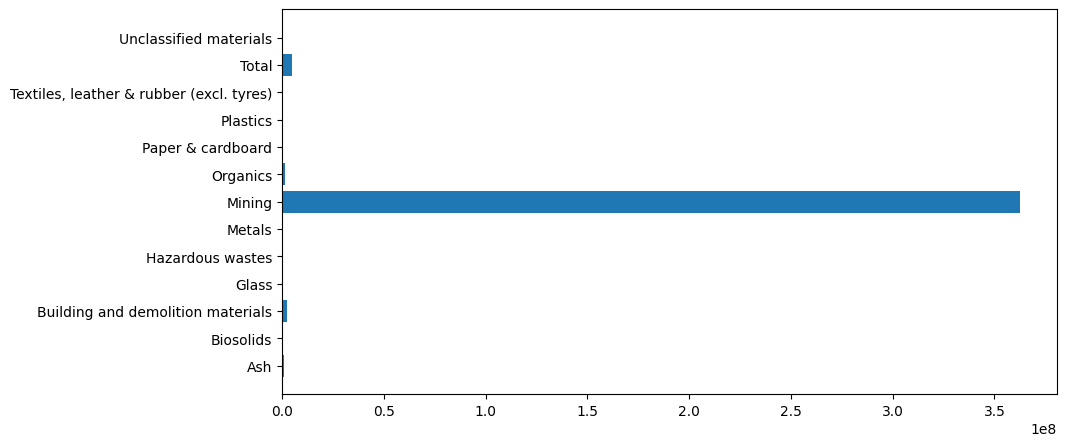

In [88]:
#I want to make a graph where you can see all the amount(ton) of waste for each category in WA 

wa_data = waste_data[waste_data["Jurisdiction"] == 'WA']

plt.barh(wa_data["Category"], wa_data["Tonnes"])



plt.show()


# TONNES of waste per TYPE

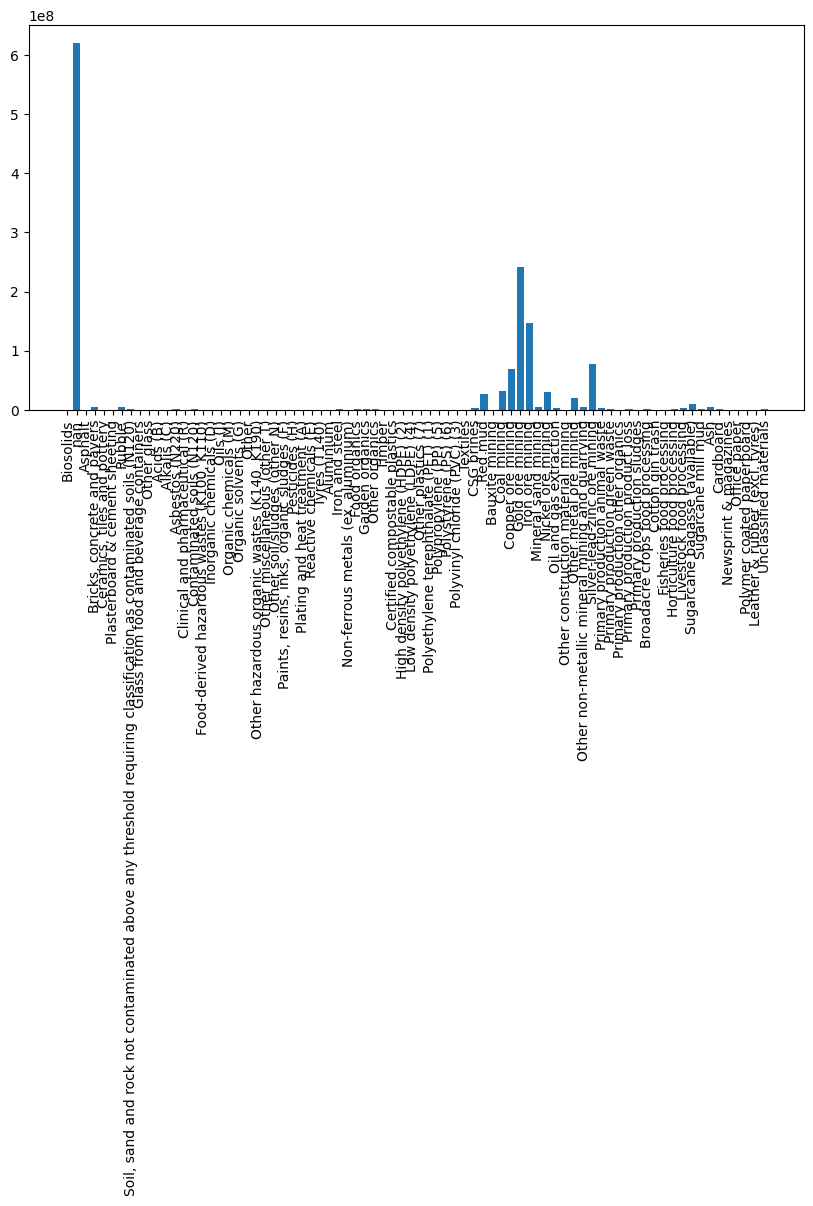

In [67]:
plt.figure()
plt.bar(waste_data['Type'], waste_data['Tonnes'])
plt.tick_params(axis='x', labelrotation=90)
plt.show()


In [ ]:
type(waste_data)

pandas.core.frame.DataFrame

# Map of Australia(UNUSABLE) - need to make it a shape to plot on it

C:\Users\grace\AppData\Local\Temp\ipykernel_36084\2034426013.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


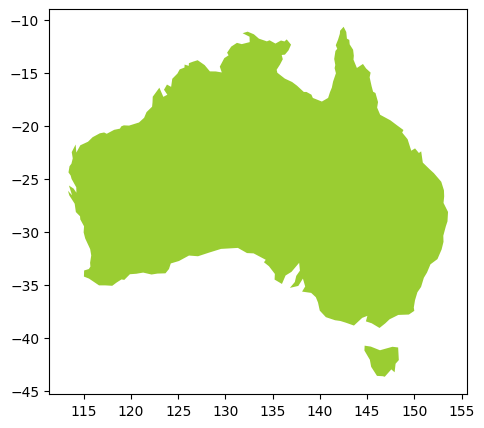

In [ ]:
# Plot Australia
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
australia= worldmap[worldmap["name"] == "Australia"].plot(color="yellowgreen")

# Tried to plot it anyway lol

KeyError: 'City'

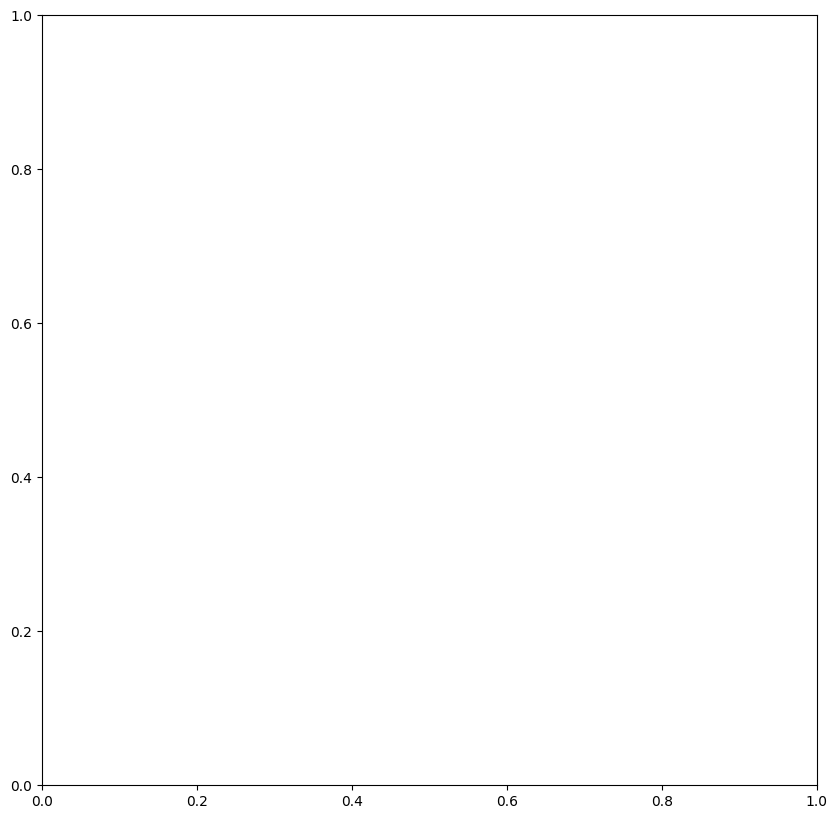

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

australia.plot(ax=ax, color='lightgrey', edgecolor='black')

scatter = ax.scatter(
    waste_data['Jurisdiction'], 
    waste_data['Classification'], 
    s=waste_data['Tonnes'] / 10,  # Scale bubble size
    c=waste_data['Tonnes'],        # Bubble color
    cmap='OrRd',                 # Colormap
    alpha=0.6,                   # Transparency
    edgecolor='k',
    linewidth=0.5,
    label=waste_data['City']
)

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Tons of Waste')

# Add labels and title
ax.set_xlabel('Jurisdiction')
ax.set_ylabel('Classification')
ax.set_title('Tons of Waste in Australian Cities')
ax.grid(True)

# Annotate each point with city name
for i, row in waste_data.iterrows():
    ax.annotate(row['City'], (row['Jurisdiction'], row['Classification']),
                textcoords="offset points", xytext=(0,10), ha='center')

# Show plot
plt.show()